In [1]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from xml.etree import ElementTree as et # parse information from XML
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# step-1: get path of each xml file
xmlfiles = glob(r'C:\MTP1\augmented\aug1\*.xml')
# replace \\ with /
replace_text = lambda x: x.replace('\\','/')
xmlfiles = list(map(replace_text,xmlfiles))

In [4]:
xmlfiles

['C:/MTP1/augmented/aug1/duck (1)_1.xml',
 'C:/MTP1/augmented/aug1/duck (1)_10.xml',
 'C:/MTP1/augmented/aug1/duck (1)_11.xml',
 'C:/MTP1/augmented/aug1/duck (1)_12.xml',
 'C:/MTP1/augmented/aug1/duck (1)_13.xml',
 'C:/MTP1/augmented/aug1/duck (1)_14.xml',
 'C:/MTP1/augmented/aug1/duck (1)_15.xml',
 'C:/MTP1/augmented/aug1/duck (1)_2.xml',
 'C:/MTP1/augmented/aug1/duck (1)_3.xml',
 'C:/MTP1/augmented/aug1/duck (1)_4.xml',
 'C:/MTP1/augmented/aug1/duck (1)_5.xml',
 'C:/MTP1/augmented/aug1/duck (1)_6.xml',
 'C:/MTP1/augmented/aug1/duck (1)_7.xml',
 'C:/MTP1/augmented/aug1/duck (1)_8.xml',
 'C:/MTP1/augmented/aug1/duck (1)_9.xml',
 'C:/MTP1/augmented/aug1/duck (10)_1.xml',
 'C:/MTP1/augmented/aug1/duck (10)_10.xml',
 'C:/MTP1/augmented/aug1/duck (10)_11.xml',
 'C:/MTP1/augmented/aug1/duck (10)_12.xml',
 'C:/MTP1/augmented/aug1/duck (10)_13.xml',
 'C:/MTP1/augmented/aug1/duck (10)_14.xml',
 'C:/MTP1/augmented/aug1/duck (10)_15.xml',
 'C:/MTP1/augmented/aug1/duck (10)_2.xml',
 'C:/MTP1/augm

In [5]:
# step-2: read xml files
# from each xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # extract filename
    image_name = root.find('filename').text
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object')
    parser = []
    for obj in objs:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])
        
    return parser

In [6]:
parser_all = list(map(extract_text,xmlfiles))

In [7]:
data = reduce(lambda x, y : x+y,parser_all)

In [8]:
df = pd.DataFrame(data,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])

In [9]:
df.head(20)

,filename,width,height,name,xmin,xmax,ymin,ymax
0,duck (1)_1.jpg,414,253,duck,261,400,51,187
1,duck (1)_1.jpg,414,253,duck,56,236,102,196
2,duck (1)_10.jpg,414,253,duck,13,152,51,187
3,duck (1)_10.jpg,414,253,duck,178,357,102,196
4,duck (1)_11.jpg,414,253,duck,261,400,51,187
5,duck (1)_11.jpg,414,253,duck,56,236,102,196
6,duck (1)_12.jpg,414,253,duck,261,400,51,187
7,duck (1)_12.jpg,414,253,duck,56,236,102,196
8,duck (1)_13.jpg,414,253,duck,13,152,51,187
9,duck (1)_13.jpg,414,253,duck,178,357,102,196


In [10]:
df.shape

(25830, 8)

In [11]:
df['name'].value_counts()

name
fish           6435
lotus          5835
Water poppy    3660
duck           3420
Hyacinth       2775
lily           2205
turtle          750
frog            750
Name: count, dtype: int64

#### Conversion
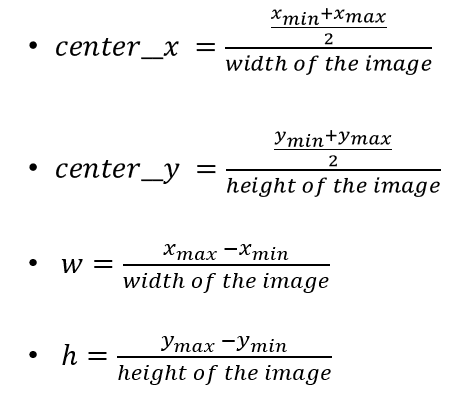

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25830 entries, 0 to 25829
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25830 non-null  object
 1   width     25830 non-null  object
 2   height    25830 non-null  object
 3   name      25830 non-null  object
 4   xmin      25830 non-null  object
 5   xmax      25830 non-null  object
 6   ymin      25830 non-null  object
 7   ymax      25830 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [13]:
# type conversion
cols = ['width','height','xmin','xmax','ymin','ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25830 entries, 0 to 25829
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25830 non-null  object
 1   width     25830 non-null  int64 
 2   height    25830 non-null  int64 
 3   name      25830 non-null  object
 4   xmin      25830 non-null  int64 
 5   xmax      25830 non-null  int64 
 6   ymin      25830 non-null  int64 
 7   ymax      25830 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ MB


In [14]:
# center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# w 
df['w'] = (df['xmax']-df['xmin'])/df['width']
# h 
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [15]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,duck (1)_1.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549
1,duck (1)_1.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542
2,duck (1)_10.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549
3,duck (1)_10.jpg,414,253,duck,178,357,102,196,0.646135,0.588933,0.432367,0.371542
4,duck (1)_11.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549


In [16]:
df.sample(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
1351,duck (45)_11.jpg,679,424,duck,457,524,235,273,0.722386,0.599057,0.098675,0.089623
14492,FLower (34)_11.jpg,874,537,lotus,93,420,36,284,0.293478,0.297952,0.374142,0.461825
9007,fish (64)_12.jpg,640,640,fish,22,165,480,569,0.146094,0.819531,0.223438,0.139063
2661,duck (9)_10.jpg,606,409,duck,198,350,99,153,0.452145,0.308068,0.250825,0.132029
17822,FLower (99)_2.jpg,552,329,lotus,305,331,137,156,0.576087,0.445289,0.047101,0.057751
13997,FLower (24)_4.jpg,686,331,lotus,287,299,234,244,0.427114,0.722054,0.017493,0.030211
20495,hy (92)_11.jpg,389,470,Hyacinth,23,125,86,210,0.190231,0.314894,0.262211,0.263830
3835,fish (11)_7.jpg,640,640,fish,534,625,297,355,0.905469,0.509375,0.142187,0.090625
4498,fish (113)_12.jpg,640,640,fish,0,154,409,490,0.120313,0.702344,0.240625,0.126562
7113,fish (2)_12.jpg,640,640,fish,122,327,241,370,0.350781,0.477344,0.320312,0.201563


### split data into train and test

In [17]:
images = df['filename'].unique()

In [18]:
len(images)

10545

In [ ]:
# # 80% train and 20% test
# img_df = pd.DataFrame(images,columns=['filename'])
# img_train = tuple(img_df.sample(frac=0.7)['filename']) # shuffle and pick 80% of images

In [ ]:
# img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images

In [21]:

# Create DataFrame from list of image filenames
img_df = pd.DataFrame(images, columns=['filename'])

# Shuffle the dataframe
img_df = img_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Compute split indices
total_images = len(img_df)
train_end = int(0.7 * total_images)
val_end = train_end + int(0.15 * total_images)

# Split the DataFrame
img_train = tuple(img_df.iloc[:train_end]['filename'])
img_val = tuple(img_df.iloc[train_end:val_end]['filename'])
img_test = tuple(img_df.iloc[val_end:]['filename'])

# Optionally print counts
print(f"Train: {len(img_train)}, Val: {len(img_val)}, Test: {len(img_test)}")


Train: 7381, Val: 1581, Test: 1583


In [22]:
len(img_train), len(img_test),len(img_val)

(7381, 1583, 1581)

In [24]:
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')
val_df = df.query(f'filename in {img_val}')

In [25]:
train_df.sample()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
8592,fish (51)_9.jpg,640,640,fish,120,220,251,317,0.265625,0.44375,0.15625,0.103125


In [26]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
2,duck (1)_10.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549
3,duck (1)_10.jpg,414,253,duck,178,357,102,196,0.646135,0.588933,0.432367,0.371542
8,duck (1)_13.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549
9,duck (1)_13.jpg,414,253,duck,178,357,102,196,0.646135,0.588933,0.432367,0.371542
10,duck (1)_14.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549


In [27]:
val_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
12,duck (1)_15.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549
13,duck (1)_15.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542
14,duck (1)_2.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549
15,duck (1)_2.jpg,414,253,duck,178,357,102,196,0.646135,0.588933,0.432367,0.371542
22,duck (1)_6.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549


### Assign id number to object names

In [28]:
# label encoding
def label_encoding(x):
    labels = {'lotus':0,
        'fish':1,
        'lily':2,
        'duck':3,
        'Water poppy':4,
        'Hyacinth':5,
        'frog':6,
        'turtle':7
        }
    return labels[x]

In [29]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)
val_df['id'] = val_df['name'].apply(label_encoding)

In [30]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,duck (1)_1.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549,3
1,duck (1)_1.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542,3
4,duck (1)_11.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549,3
5,duck (1)_11.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542,3
6,duck (1)_12.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549,3
7,duck (1)_12.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542,3
16,duck (1)_3.jpg,414,253,duck,261,400,51,187,0.798309,0.470356,0.335749,0.537549,3
17,duck (1)_3.jpg,414,253,duck,56,236,102,196,0.352657,0.588933,0.434783,0.371542,3
20,duck (1)_5.jpg,414,253,duck,13,152,51,187,0.199275,0.470356,0.335749,0.537549,3
21,duck (1)_5.jpg,414,253,duck,178,357,102,196,0.646135,0.588933,0.432367,0.371542,3


### Save Image and Labels in text

In [31]:
import os
from shutil import move

In [34]:
train_folder = r'C:\MTP1\augmented\Dataset\train'
test_folder = r'C:\MTP1\augmented\Dataset\test'
val_folder = r'C:\MTP1\augmented\Dataset\val'


os.mkdir(train_folder)
os.mkdir(test_folder)
os.mkdir(val_folder)

In [35]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')
groupby_obj_val = val_df[cols].groupby('filename')

In [36]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join(r'C:\MTP1\augmented\aug1',filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)
    

In [37]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [38]:
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
7376    None
7377    None
7378    None
7379    None
7380    None
Length: 7381, dtype: object

In [39]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0       None
1       None
2       None
3       None
4       None
        ... 
1578    None
1579    None
1580    None
1581    None
1582    None
Length: 1583, dtype: object

In [40]:
filename_series_val = pd.Series(groupby_obj_val.groups.keys())
filename_series_val.apply(save_data,args=(val_folder,groupby_obj_val))

0       None
1       None
2       None
3       None
4       None
        ... 
1576    None
1577    None
1578    None
1579    None
1580    None
Length: 1581, dtype: object